In [1]:
import math
from PIL import Image
import requests
from io import BytesIO
import pandas as pd
import matplotlib.pyplot as plt
from fastkml import kml
import geopandas as gpd
from shapely.geometry import LineString
import requests
from PIL import Image
import matplotlib.patheffects as path_effects

from io import BytesIO
import numpy as np
import osmnx as ox
from adjustText import adjust_text
%config InlineBackend.figure_format = 'retina'

In [2]:
API_KEY = "your google static api info"

In [3]:
road_way = gpd.read_file('road_way.kml',driver = 'KML')

In [4]:
rd_long = []
rd_lat = []
for index, geometry in enumerate(road_way.geometry):
    if geometry.geom_type == 'LineString':
        # Split coordinates of the LineString
        coordinates = list(geometry.coords)  # Extract coordinates as a list of tuples
        
        # Print each point
        for point in coordinates:
            longitude, latitude, _ = point  # Unpack the longitude, latitude, and elevation (if present)
            rd_long.append(longitude)
            rd_lat.append(latitude)
            # print(f"Longitude: {longitude}, Latitude: {latitude}")

In [5]:
road_coords = []
for index, geometry in enumerate(road_way.geometry):
    if geometry.geom_type == 'LineString':
        # Split coordinates of the LineString
        coordinates = list(geometry.coords)  # Extract coordinates as a list of tuples

        for point in coordinates:
            
            longitude, latitude, _ = point  # Unpack the longitude, latitude, and elevation (if present)
            road_coords.append([longitude, latitude])


In [6]:
road_path = '|'.join([f"{lat},{lon}" for lon, lat in road_coords])

In [7]:
gdf = gpd.read_file('NewFiberPath041822.kml',driver = 'KML')

In [8]:
long = []
lat = []
for index, geometry in enumerate(gdf.geometry):
    if geometry.geom_type == 'LineString':
        # Split coordinates of the LineString
        coordinates = list(geometry.coords)  # Extract coordinates as a list of tuples
        
        # Print each point
        for point in coordinates:
            longitude, latitude, _ = point  # Unpack the longitude, latitude, and elevation (if present)
            long.append(longitude)
            lat.append(latitude)
            # print(f"Longitude: {longitude}, Latitude: {latitude}")

In [9]:
line_coords = []
for index, geometry in enumerate(gdf.geometry):
    if geometry.geom_type == 'LineString':
        # Split coordinates of the LineString
        coordinates = list(geometry.coords)  # Extract coordinates as a list of tuples

        for point in coordinates:
            
            longitude, latitude, _ = point  # Unpack the longitude, latitude, and elevation (if present)
            line_coords.append([longitude, latitude])


In [10]:
path = '|'.join([f"{lat},{lon}" for lon, lat in line_coords])

In [11]:
tap_data = pd.read_excel('ANISCI_plotting copy.xlsx')

In [12]:
path_fiber = '|'.join([f"{lat},{lon}" for lon, lat in line_coords])

In [14]:
# input parameter
min_lat, max_lat = 43.07115645132712, 43.07682252213048  # range of latitude
min_lon, max_lon = -89.4160124882671, -89.40503397674919  # range of longitude
api_key = API_KEY  # 替换为你的 Google Maps API Key

# calculate the map center
center_lat = (min_lat + max_lat) / 2
center_lon = (min_lon + max_lon) / 2

# Google Maps API parameter
size = "640x400"  # Google Maps size that support
scale = 4  # high resolution
# maptype = "satellite"  # 
# maptype = "hybrid"  #
maptype = "roadmap"  #

zoom = 16  # scale value
# zoom = 12  # scale value

# 
url = (
    f"https://maps.googleapis.com/maps/api/staticmap"
    f"?center={center_lat},{center_lon}"
    f"&zoom={zoom}&size={size}&scale={scale}"
    f"&maptype={maptype}&key={api_key}"
    f"&path=color:0xFF8000ff|weight:5|{path}"
    f"&path=color:0x000000ff|weight:5|{road_path}"
    f"&style=feature:poi|element:labels|visibility:off"
    # f"&style=feature:landscape.man_made|element:geometry.fill|color:0xD3D3D3"

    # f"&{marker_url_part}"
)

# acquire map figure
response = requests.get(url)
if response.status_code != 200:
    print(f"Failed to fetch map. Error code: {response.status_code}")
    exit()

# open figure
image = Image.open(BytesIO(response.content))

In [15]:
zoom_diff = 16 - 12  # = 4
factor = 2 ** zoom_diff  # = 16

lat_span_12 = (max_lat-min_lat) * factor
lon_span_12 = (max_lon-min_lon) * factor

lat_min_12 = center_lat - lat_span_12 / 2
lat_max_12 = center_lat + lat_span_12 / 2
lon_min_12 = center_lon - lon_span_12 / 2
lon_max_12 = center_lon + lon_span_12 / 2

In [16]:
# Google Maps API parameters
size = "640x400"  # Google Maps size that support
scale = 4  # high resolution
# maptype = "satellite"  # 
# maptype = "hybrid"  #
maptype = "roadmap"  #

# zoom = 16  # scale value
zoom = 12  # scale value

# 
url = (
    f"https://maps.googleapis.com/maps/api/staticmap"
    f"?center={center_lat},{center_lon}"
    f"&zoom={zoom}&size={size}&scale={scale}"
    f"&maptype={maptype}&key={api_key}"
    f"&style=feature:poi|element:labels|visibility:off"
)

# acquire map figure
response = requests.get(url)
if response.status_code != 200:
    print(f"Failed to fetch map. Error code: {response.status_code}")
    exit()

# open figure
image_12 = Image.open(BytesIO(response.content))

In [17]:
text_data = pd.read_excel('ANISCI_text.xlsx')

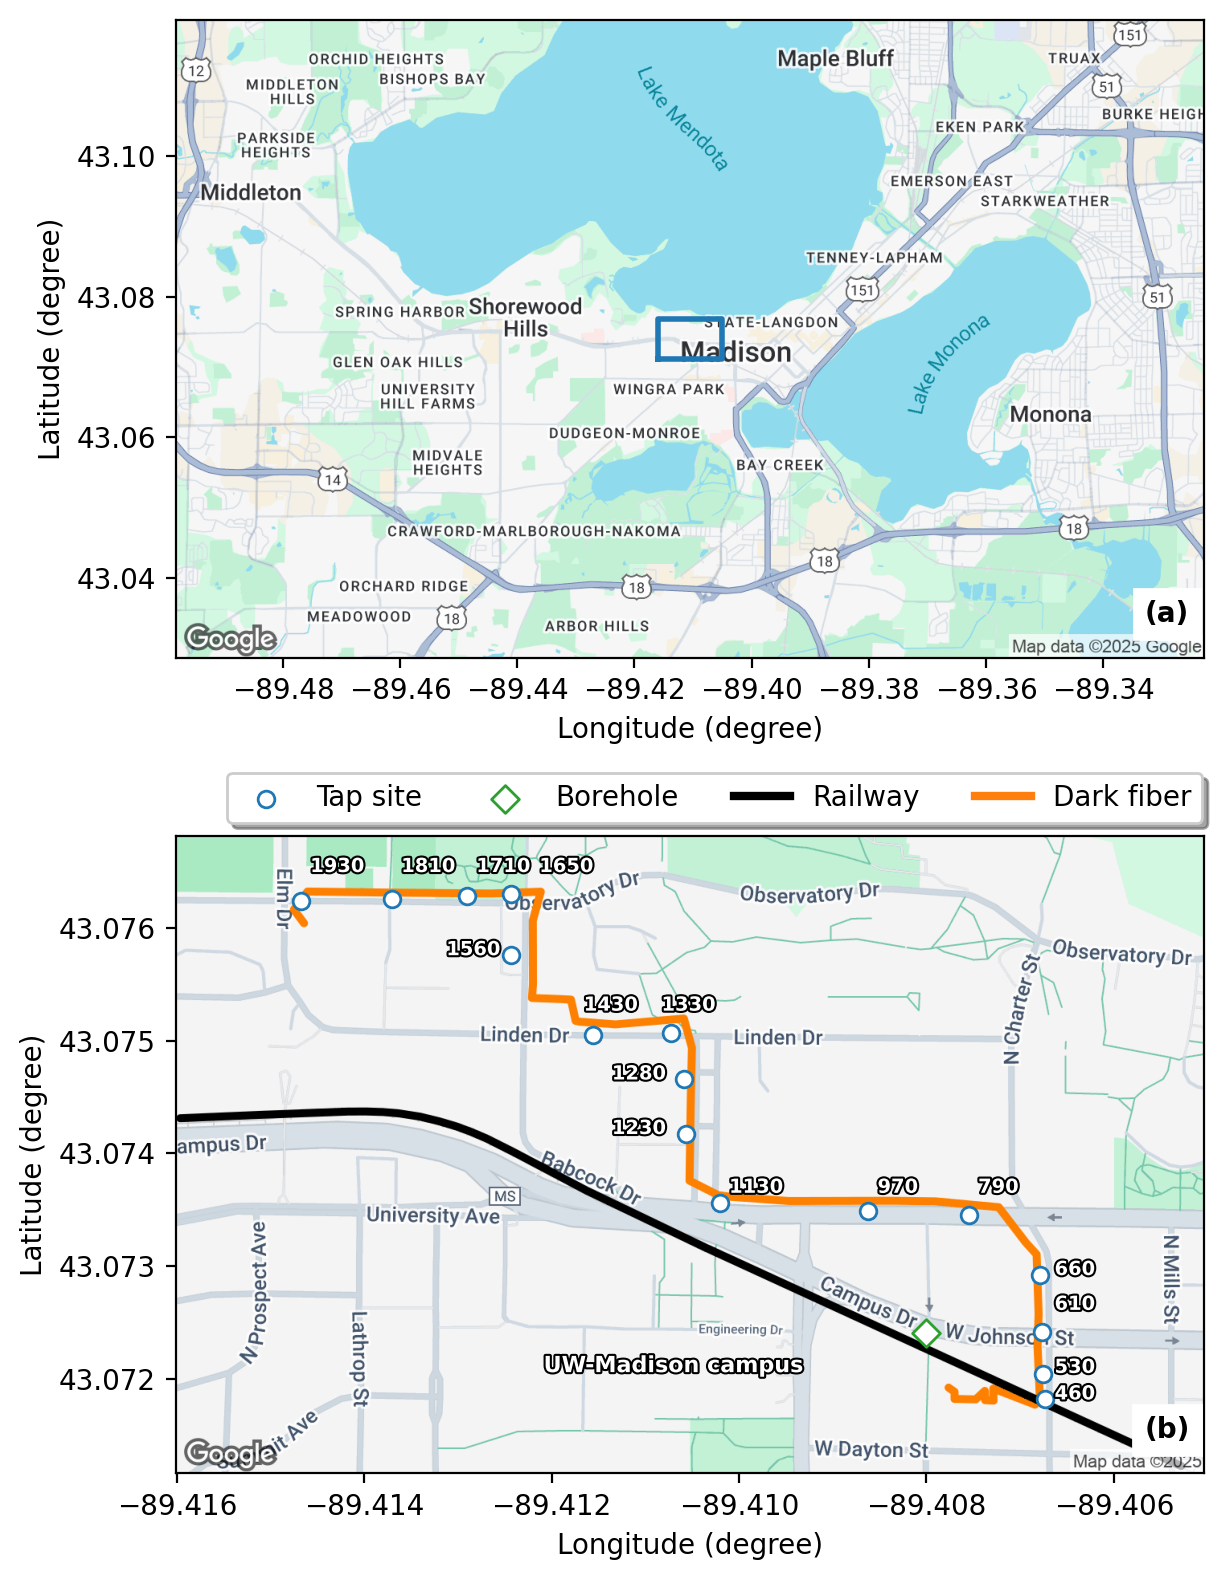

In [18]:
fig, axs = plt.subplots(2,1,figsize = (6.4 ,4*2))

################################ zoom out figure ########################################
axs[0].imshow(image_12, extent=[lon_min_12, lon_max_12, lat_min_12, lat_max_12], aspect='auto') 
x_min, x_max = axs[0].get_xlim()  # Get x-axis limits
y_min, y_max = axs[0].get_ylim()  # Get y-axis limits
axs[0].plot([min_lon,max_lon,max_lon,min_lon,min_lon],[min_lat,min_lat,max_lat,max_lat,min_lat],
           lw = 2)

axs[0].set_xlabel("Longitude (degree)")
axs[0].set_ylabel("Latitude (degree)")

################################ zoom in figure ########################################
axs[1].imshow(image, extent=[min_lon, max_lon, min_lat, max_lat], aspect='auto') 

axs[1].scatter(tap_data['Longitude'], tap_data['Latitude'],label = 'Tap site',c = 'w',edgecolor = 'tab:blue')

axs[1].scatter([-89.408], [43.0724],s = 50, label = 'Borehole',marker='D',edgecolor='#2ca02c',c = 'w')

texts = []
for i in range(len(text_data)):
    txt = axs[1].text(text_data['Longitude'][i]+0.0001,text_data['Latitude'][i],text_data['Channel Out'][i],
            c = 'w',fontsize = 7,fontweight = 'bold')  
    txt.set_path_effects([
    path_effects.Stroke(linewidth=1.5, foreground='black'), 
    path_effects.Normal()])
    texts.append(txt)
# adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray')) 
# adjust_text(texts) 
axs[1].ticklabel_format(style='plain', axis='y', useOffset=False)  

axs[1].set_xlabel("Longitude (degree)")
axs[1].set_ylabel("Latitude (degree)")

x_min, x_max = axs[1].get_xlim()  # Get x-axis limits
y_min, y_max = axs[1].get_ylim()  # Get y-axis limits

axs[1].set_xlim(x_min, x_max)
axs[1].set_ylim(y_min, y_max)

# plt.title("Map with Bounding Box", fontsize=16)
axs[1].plot([0,0], [0,0], label = 'Railway',c = 'k',lw = 3)
axs[1].plot([0,0], [0,0], label = 'Dark fiber',c = '#ff7f0e',lw = 3)

txt = axs[1].text(-89.4120853, 43.0720568, 'UW-Madison campus',c = "w",fontweight = 'bold',
              fontsize = 8
        )
txt.set_path_effects([
    path_effects.Stroke(linewidth=1.5, foreground='black'), 
    path_effects.Normal()  
])
# rotation
# ax.grid(True, ls = '--')
# ax.grid(True)

axs[1].legend(shadow = True,ncol = 4,loc = (0.05,1.02))
fig.text(0.92, 0.61, '(a)', ha='center', va='center', fontweight='bold', bbox=dict(facecolor='white',edgecolor = 'w'))
fig.text(0.92, 0.10, '(b)', ha='center', va='center', fontweight='bold', bbox=dict(facecolor='white',edgecolor = 'w'))
plt.tight_layout()

# fig.savefig('google_map_uni_campus.png', dpi=600,bbox_inches = 'tight')

plt.show()
